# Progressive activity coverage of LLM-Explorer over time

In [15]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

app_list = ['activitydiary', 'applauncher', 'calculator', 'calendar', 'camera', 'clock', 'contacts', 'draw', 'filemanager', 'gallery', 'gmail', 'keyboard', 'markor', 'musicplayer', 'myexpenses', 'notes', 'opentracks', 'smsmessenger', 'voicerecorder', 'wikipedia']
print(len(app_list))
results_all_path = "./results_all"

method_coverage = [0] * 7200
app_time_max_list = []
app_rate_max_list = []
for app in os.listdir(results_all_path):
    for app_name in app_list:
        if app_name in app:
            app_path = os.path.join(results_all_path, app)
            rate_path = os.path.join(app_path, 'time_coverage_rate.csv')
            # print(rate_path)
            app_time_list = []
            app_rate_list = []
            with open(rate_path, mode='r', encoding='utf-8') as file:
                csv_reader = csv.reader(file)
                i = 0
                method_coverage_i = [0] * 7200
                for row in csv_reader:
                    if i == 0:
                        i = 1
                        continue
                    if int(float(row[0])) > 7200:
                        break
                    app_time_list.append(row[0])
                    app_rate_list.append(row[1])
                    method_coverage_i[int(float(row[0]))-1] = float(row[1])
                for i in range(len(method_coverage_i)):
                    if method_coverage_i[i] == 0:
                        for j in range(i+1):
                            if method_coverage_i[i-j] != 0:
                                method_coverage_i[i] = method_coverage_i[i-j]
                                break
                    
                for i in range(len(method_coverage_i)):
                    method_coverage[i] += method_coverage_i[i]
                
for i in range(len(method_coverage)):
    method_coverage[i] = method_coverage[i] / len(app_list)
method_csv = {
    "time": [i for i in range(1, 7201)],
    "coverage_rate": method_coverage
}
df = pd.DataFrame(method_csv)
csv_filename = os.path.join(results_all_path, f'time_coverage_rate.csv')
df.to_csv(csv_filename, index=False)
print(f'CSV文件已保存为: {csv_filename}')


20
CSV文件已保存为: ./results_all/time_coverage_rate.csv


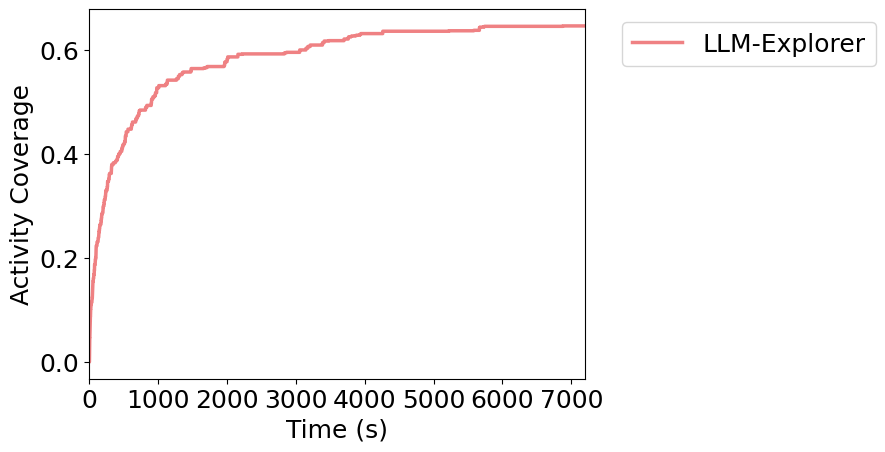

In [16]:
app_path = "./results_all"
df_droidbot_llm = pd.read_csv(os.path.join(app_path, f'time_coverage_rate.csv'))

df_droidbot_llm = df_droidbot_llm.query('time <= 7200')
last_coverage_rate = df_droidbot_llm.iloc[-1]['coverage_rate']
df_droidbot_llm.loc[len(df_droidbot_llm)] = [7200, last_coverage_rate]
df_droidbot_llm.index = range(len(df_droidbot_llm))


plt.plot(df_droidbot_llm['time'], df_droidbot_llm['coverage_rate'], linestyle='-', color='#ef8183', linewidth=2.5)


plt.xticks([0, 1000, 2000, 3000, 4000, 5000, 6000, 7000])
plt.xlim(0, 7200)
plt.legend(['LLM-Explorer'], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('Time (s)')
plt.ylabel('Activity Coverage')
mpl.rcParams['font.size'] = 18


file_path_image = 'activity_coverage_by_time.png'
plt.savefig(file_path_image, format='png', dpi=300, bbox_inches='tight')
file_path_image = 'activity_coverage_by_time.pdf'
plt.savefig(file_path_image, format='pdf', dpi=300, bbox_inches='tight')


# 显示图表
plt.show()

# Progressive activity coverage of LLM-Explorer over steps

In [17]:
import os
import json
import csv
import pandas as pd

app_list = ['activitydiary', 'applauncher', 'calculator', 'calendar', 'camera', 'clock', 'contacts', 'draw', 'filemanager', 'gallery', 'gmail', 'keyboard', 'markor', 'musicplayer', 'myexpenses', 'notes', 'opentracks', 'smsmessenger', 'voicerecorder', 'wikipedia']
results_all_path = "./results_all"

app_time_max_list = []
app_rate_max_list = []
method_max_step = 0
for app in os.listdir(results_all_path):
    for app_name in app_list:
        if app_name in app:
            app_path = os.path.join(results_all_path, app)
            rate_path = os.path.join(app_path, 'time_coverage_rate.csv')
            # print(rate_path)
            app_time_list = []
            app_rate_list = []
            with open(rate_path, mode='r', encoding='utf-8') as file:
                csv_reader = csv.reader(file)
                i = 0
                for row in csv_reader:
                    i += 1
                i -= 1
                if i > method_max_step:
                    method_max_step = i
print(method_max_step)

method_coverage = [0] * method_max_step                
for app in os.listdir(results_all_path):
    for app_name in app_list:
        if app_name in app:
            app_path = os.path.join(results_all_path, app)
            rate_path = os.path.join(app_path, 'time_coverage_rate.csv')
            # print(rate_path)
            app_time_list = []
            app_rate_list = []
            with open(rate_path, mode='r', encoding='utf-8') as file:
                csv_reader = csv.reader(file)
                j = 0
                method_coverage_i = [0] * method_max_step
                for row in csv_reader:
                    if j == 0:
                        j += 1
                        continue
                    if int(float(row[0])) > 7200:
                        break
                    app_time_list.append(row[0])
                    app_rate_list.append(row[1])
                    # print(j)
                    method_coverage_i[j-1] = float(row[1])
                    j += 1
                    
                for i in range(len(method_coverage_i)):
                    if method_coverage_i[i] == 0:
                        for j in range(i+1):
                            if method_coverage_i[i-j] != 0:
                                method_coverage_i[i] = method_coverage_i[i-j]
                                break
                    
                for i in range(len(method_coverage_i)):
                    method_coverage[i] += method_coverage_i[i]
                
for i in range(len(method_coverage)):
    method_coverage[i] = method_coverage[i] / len(app_list)
method_csv = {
    "time": [i for i in range(len(method_coverage))],
    "coverage_rate": method_coverage
}

df = pd.DataFrame(method_csv)
csv_filename = os.path.join(results_all_path, f'time_coverage_rate_step.csv')
df.to_csv(csv_filename, index=False)
print(f'CSV文件已保存为: {csv_filename}')

2679
CSV文件已保存为: ./results_all/time_coverage_rate_step.csv


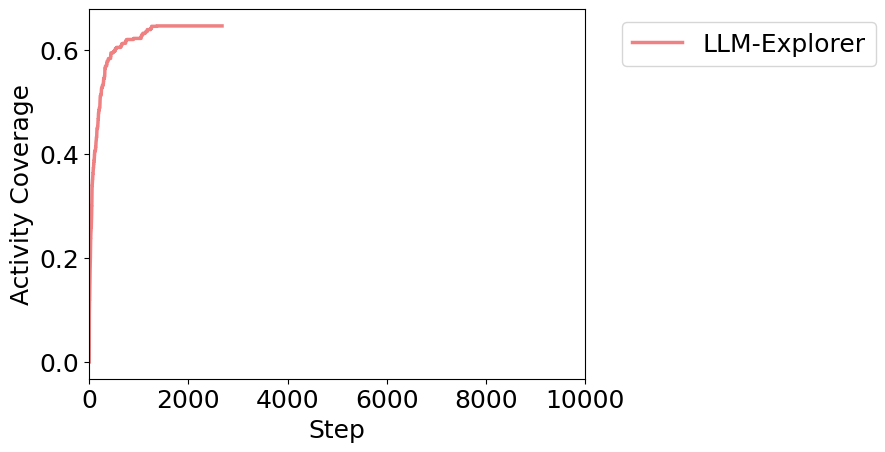

In [18]:
step_nums = []

app_path = "./results_all"
df_droidbot_llm = pd.read_csv(os.path.join(app_path, f'time_coverage_rate_step.csv'))

last_coverage_rate = df_droidbot_llm.iloc[-1]['coverage_rate']
step_nums.append(len(df_droidbot_llm))

step_num_max = max(step_nums)
step_num_max = 10000

plt.plot(range(1, len(df_droidbot_llm['coverage_rate'])+1), df_droidbot_llm['coverage_rate'], linestyle='-', color='#ef8183', linewidth=2.5)

plt.xlim(0, step_num_max)
plt.legend(['LLM-Explorer', 'DroidAgent', 'GPTDroid', 'Humanoid', 'DroidBot', 'Monkey', 'Human'], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('Step')
plt.ylabel('Activity Coverage')
mpl.rcParams['font.size'] = 18

file_path_image = 'activity_coverage_by_step.pdf'
plt.savefig(file_path_image, format='pdf', dpi=300, bbox_inches='tight')


plt.show()